# Tutorial 2 :  Cadeia de spin antiferromagnética vizinha mais próxima

### Define-se a cadeia

> In spinw/genlattice (line 127)
Magnetic lattice:

ans =

  1x4 table

     matom      idx    S        pos    
    ________    ___    _    ___________

    {'MCu1'}     1     1    0    0    0

Creating 3D plot... 
> In swplot.figure (line 142)
In swplot.activefigure (line 71)
In spinw/plot (line 150)
...3k faces and 2k vertices are drawn!



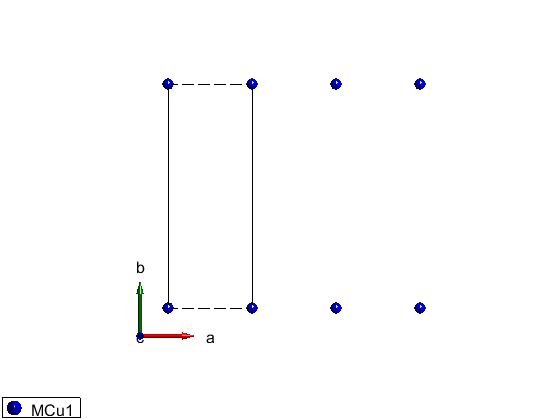

In [57]:
% Cria uma nova instância da classe spinw
AFMchain = spinw;

% Define a estrutura da rede cristalina com os parâmetros especificados
AFMchain.genlattice('lat_const',[3 8 8],'angled',[90 90 90],'spgr',0);

% Adiciona um átomo de cobre magnético com spin S=1 na posição (0, 0, 0)
AFMchain.addatom('r',[0 0 0],'S',1,'label','MCu1','color','blue');

% Exibe a tabela da rede magnética
disp('Magnetic lattice:')
AFMchain.table('matom')

% Plota a estrutura cristalina
plot(AFMchain,'range',[3 1 1])


Aqui inicializa um sistema de modelo de cadeia magnética antiferromagnética de átomos de cobre. Ele define a estrutura da rede cristalina, adiciona um átomo magnético de cobre à posição (0, 0, 0) e visualiza a estrutura cristalina resultante.

### Cria-se as interações antiferromagnéticas


Creating the bond list (maxDistance = 7 Å, nCell = 3x1x1)...
...2 bonds are retained out of 36 generated!

ans =

  2x10 table

    idx    subidx        dl             dr         length     matom1     idx1     matom2     idx2                    matrix                
    ___    ______    ___________    ___________    ______    ________    ____    ________    ____    ______________________________________

     1       1       1    0    0    1    0    0      3       {'MCu1'}     1      {'MCu1'}     1      {0x0 char}    {0x0 char}    {0x0 char}
     2       1       2    0    0    2    0    0      6       {'MCu1'}     1      {'MCu1'}     1      {0x0 char}    {0x0 char}    {0x0 char}

After assigning a matrix to a bond:

ans =

  2x10 table

    idx    subidx        dl             dr         length     matom1     idx1     matom2     idx2                    matrix                
    ___    ______    ___________    ___________    ______    ________    ____    ________    ____    ___________

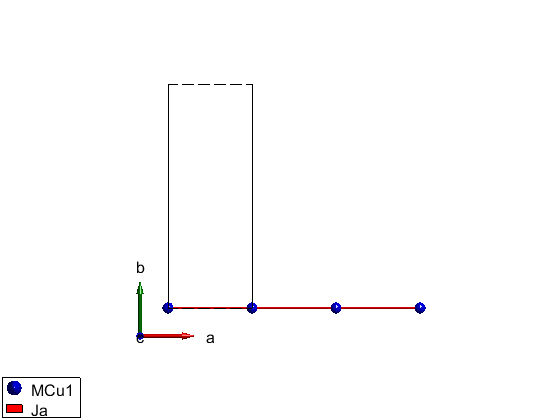

In [61]:
% Gera as interações antiferromagnéticas entre os átomos, considerando vizinhos próximos dentro de 7 Å
AFMchain.gencoupling('maxDistance',7);

% Exibe a tabela das ligações
AFMchain.table('bond',[1 2])

% Adiciona uma matriz para representar a interação antiferromagnética
AFMchain.addmatrix('label','Ja','value',1,'color','red');

% Atribui a matriz de interação antiferromagnética aos pares de átomos na rede
AFMchain.addcoupling('mat','Ja','bond',1);

% Exibe a tabela das ligações
disp('After assigning a matrix to a bond:')
AFMchain.table('bond',[1 2])

% Plota a estrutura cristalina com as interações antiferromagnéticas
plot(AFMchain,'range',[3 0.9 0.9])


Aqui são geradas e atribuídas as interações antiferromagnéticas entre os átomos na rede. Em seguida, as ligações e as interações são exibidas em uma tabela, e a matriz de interação é representada graficamente na estrutura cristalina. De notar que Ja = 1 meV, sinal positivo denota interação antiferromagnética.


### Há duas maneiras de definir a estrutura magnética


#### 1ª : Definir todos dos spins


In [66]:
AFMchain.genmagstr('mode','direct','k',[1/2 0 0],'n',[1 0 0],'S',[0 0; 1 -1;0 0],'nExt',[2 1 1]);

> In spinw/genmagstr (line 280)



Define-se uma supercélula magnética 2x1x1 do reticulado cristalino e especifica-se ambdas as direções do spin na supercélula com os parâmetros:
- Vetor de onda de ordenação magnética: k = (1/2 0 0)
- Direção dos spins: pontos ao longo das direções y positiva e negativa -> S = [[0 1 0]' [0 -1 0]']
- Normal aos vetores de spin: n = (1 0 0)

Na função genmagstr:
###### S: matriz que especifica a direção do spin em cada célula
###### nExt: vetor que especifica a supercélula em cada direção



#### 2ª: Define-se apenas um spin


Magnetic structure:

ans =

  2x8 table

    num     matom      idx    S      realFhat         imagFhat           pos              kvect      
    ___    ________    ___    _    _____________    _____________    ___________    _________________

     1     {'MCu1'}     1     1    0     1     0    0     0     1    0    0    0    0.5      0      0
     2     {'MCu1'}     1     1    0    -1     0    0     0    -1    1    0    0    0.5      0      0

Ground state energy: -1.000 meV/spin.
Creating 3D plot... 
> In swplot.figure (line 142)
In swplot.activefigure (line 71)
In spinw/plot (line 150)
...2k faces and 1k vertices are drawn!



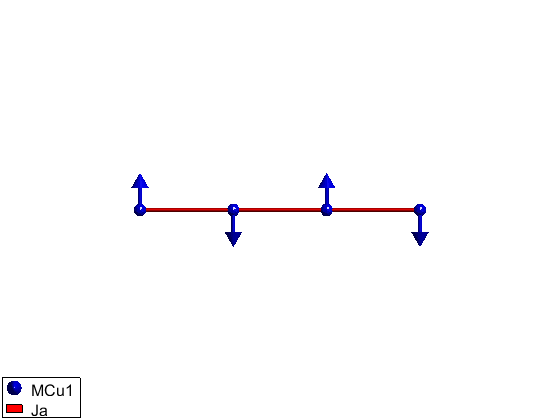

In [70]:
AFMchain.genmagstr('mode','helical','k',[1/2 0 0],'n',[1 0 0],'S',[0; 1; 0],'nExt',[2 1 1]);
% Exibe a estrutura magnética gerada

disp('Magnetic structure:')
AFMchain.table('mag')
% Calcula e exibe a energia do estado fundamental

AFMchain.energy

% Plota a estrutura magnética
plot(AFMchain,'range',[3 0.9 0.9],'cellMode','none','baseMode','none')

Define-se a direção do spin em uma célula do reticulado cristalino e deixa-se que a função genmagstr() gere o outro spin baseado no vetor de onda de ordenação magnética e nos vetores normais.
Parâmetros:
- Direção do spin: definido na célula unitária
- k: vetor de onda de ordenação magnética
- n: vetor normal

Este método é útil para criar estruturas complexas. Ambos os métodos fornecem a mesma estrutura magnética, todos os valores armazenados no campo afchain.mag_str são iguais.


### Espectro de ondas de spin

Calcula-se o espectro de ondas de spin e as secções transversais de espalhamento de neutrões ao longo da direção da cadeia. A secção transversal de espalhamento de neutrões é plotada juntamente com a dispersão (linha preta)

Calculating COMMENSURATE spin wave spectra (nMagExt = 2, nHkl = 523, nTwin = 1)...
No magnetic form factor is included in the calculated structure factor.
No g-tensor is included in the calculated structure factor.
                                        
100.00%, remained: 000:00:00 (HH:MM:SS).
Calculation is finished in 00:00:00 (hh:mm:ss).
Calculation finished.



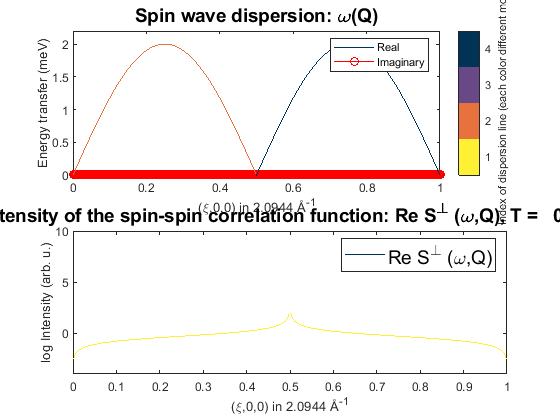

In [75]:
% Esta linha calcula o espectro de ondas de spin para o sistema modelado. Os parâmetros passados
% para a função spinwave() incluem as direções dos vetores de onda das ondas de spin 
% (um ponto em [0 0 0] e outro em [1 0 0]) e o número de pontos para a discretização (523).
afcSpec = AFMchain.spinwave({[0 0 0] [1 0 0] 523}, 'hermit',true);
figure
subplot(2,1,1)
% plota o espectro de ondas de spin no subplot selecionado. 
% Os parâmetros passados incluem o modo de plotagem ('mode'), 
% a resolução de energia ('dE'), e os limites do eixo x ('axLim').
sw_plotspec(afcSpec,'mode',4,'dE',0.2,'axLim',[0 3])

% Para calcular a intensidade, precisamos somar a intensidade dos dois modos de onda de spin 
% degenerados usando a função sw_omegasum(). Em seguida, plotamos o logaritmo da intensidade.


% Calcula a contribuição dos spins para o espectro de dispersão.
afcSpec = sw_neutron(afcSpec);
% Calcula a grade de energia para a seção transversal da dispersão.
afcSpec = sw_egrid(afcSpec,'Evect',linspace(0,6.5,500),'component','Sperp');
% Soma as contribuições dos dois modos degenerados de ondas de spin.
afcSpec = sw_omegasum(afcSpec,'zeroint',1e-6);
subplot(2,1,2)
% Plota o espectro de ondas de spin no segundo subplot, em escala logarítmica.
sw_plotspec(afcSpec,'mode',2,'log',true,'axLim',[-4 10])

% Posiciona a figura na tela de forma semelhante à posição dos eixos usando a função subplot().
swplot.subfigure(1,3,1)